In [5]:
# Add the parent directory to the path so that we can import the src module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [14]:
from src.camera import intrinsic_matrix
from src.pose import position_estimation

In [15]:
import cv2 as cv
img = cv.imread("chessprinting2.png")

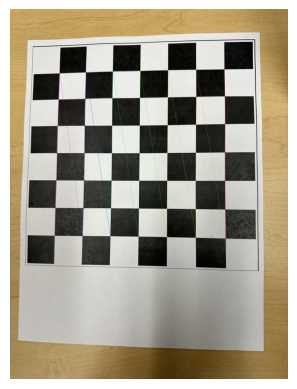

Intrinsic Matrix (Camera Matrix):
 [[2.34065029e+03 0.00000000e+00 1.50078994e+03]
 [0.00000000e+00 2.33198324e+03 2.05112279e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [16]:
calibration = intrinsic_matrix.find_intrinsic_matrix(img)

In [17]:
calibration.intrinsic_matrix

array([[2.34065029e+03, 0.00000000e+00, 1.50078994e+03],
       [0.00000000e+00, 2.33198324e+03, 2.05112279e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])